# Learning To Rank Currency Investments

## 1 Generate Time Series Data

Data Feeding for Training (and Updating) based on [Python YFinance API](https://github.com/ranaroussi/yfinance). Complete

In [2]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

import numpy as np

In [9]:
INCEPTION_DATE = "1998-1-02" # CONSTANT
CUT_DATE = "2022-09-30"      # OTHER CONSTANT (consider to move to a module)

CURRENCIES = [
    "EURUSD=X", "EURJPY=X", "EURGBP=X", 		    		
    "EURCAD=X",	"EURAUD=X",	"EURNZD=X",		
    "EURDKK=X",	"EURNOK=X",	"EURSEK=X",
    "EURCHF=X"
]

data = yf.download(
    CURRENCIES,
    INCEPTION_DATE,
    CUT_DATE
)["Close"]

data
# Insert Here a Adjusting Layer (Open, High, Low, ...) for taking into account Corporate Events

[*********************100%***********************]  10 of 10 completed


,EURAUD=X,EURCAD=X,EURCHF=X,EURDKK=X,EURGBP=X,EURJPY=X,EURNOK=X,EURNZD=X,EURSEK=X,EURUSD=X
Date,,,,,,,,,,
1998-11-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.44470,NaN
1998-11-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.42840,NaN
1998-11-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.38530,NaN
1998-11-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.35610,NaN
1998-11-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.32440,NaN
...,...,...,...,...,...,...,...,...,...,...
2022-09-23,1.48064,1.32538,0.96000,7.43590,0.87340,139.998993,10.22999,1.68234,10.88692,0.984155
2022-09-26,1.48308,1.31540,0.95160,7.43630,0.89710,139.001007,10.25623,1.68685,10.94192,0.968992
2022-09-27,1.48664,1.31931,0.95464,7.43601,0.89321,139.003006,10.37783,1.69850,10.89363,0.962371


In [10]:
data.dropna(how="any", inplace=True)

In [12]:
data.to_csv(
    "data/FX_rates.csv",    
)


In [20]:
del counter_data
import gc
gc.collect()

170

In [23]:
inverse_fx_data = 1/data

In [24]:
# Putting names of currency invested from € investor point of view (G10 Countries)
direct_symbols = inverse_fx_data.columns.tolist()

inverse_symbols = list()
for symbol in direct_symbols:        
    inverse_symbols.append(
        symbol.replace("EUR","").replace("=X","")
        )

inverse_symbols
inverse_fx_data.columns = inverse_symbols
inverse_fx_data

,AUD,CAD,CHF,DKK,GBP,JPY,NOK,NZD,SEK,USD
Date,,,,,,,,,,
2003-12-01,0.608532,0.641190,0.644122,0.134412,1.437401,0.007658,0.122489,0.537519,0.110926,0.83577
2003-12-02,0.605877,0.638162,0.642591,0.134382,1.432665,0.007608,0.122496,0.535045,0.111015,0.82720
2003-12-03,0.608236,0.634558,0.641890,0.134387,1.427144,0.007618,0.123183,0.533561,0.111458,0.82488
2003-12-04,0.609310,0.631752,0.642674,0.134401,1.424907,0.007648,0.123704,0.534759,0.111595,0.82775
2003-12-05,0.604522,0.629882,0.644995,0.134400,1.422475,0.007649,0.123724,0.530082,0.111818,0.82055
...,...,...,...,...,...,...,...,...,...,...
2022-09-23,0.675384,0.754501,1.041667,0.134483,1.144951,0.007143,0.097752,0.594410,0.091853,1.01610
2022-09-26,0.674272,0.760225,1.050862,0.134475,1.114703,0.007194,0.097502,0.592821,0.091392,1.03200
2022-09-27,0.672658,0.757972,1.047515,0.134481,1.119558,0.007194,0.096359,0.588755,0.091797,1.03910


In [25]:
inverse_fx_data.to_csv(
    "data/inverse_FX_rates.csv"
)

### Brief Exploration-Graph Analysis (EDA complete delayed)



<AxesSubplot:xlabel='Date'>

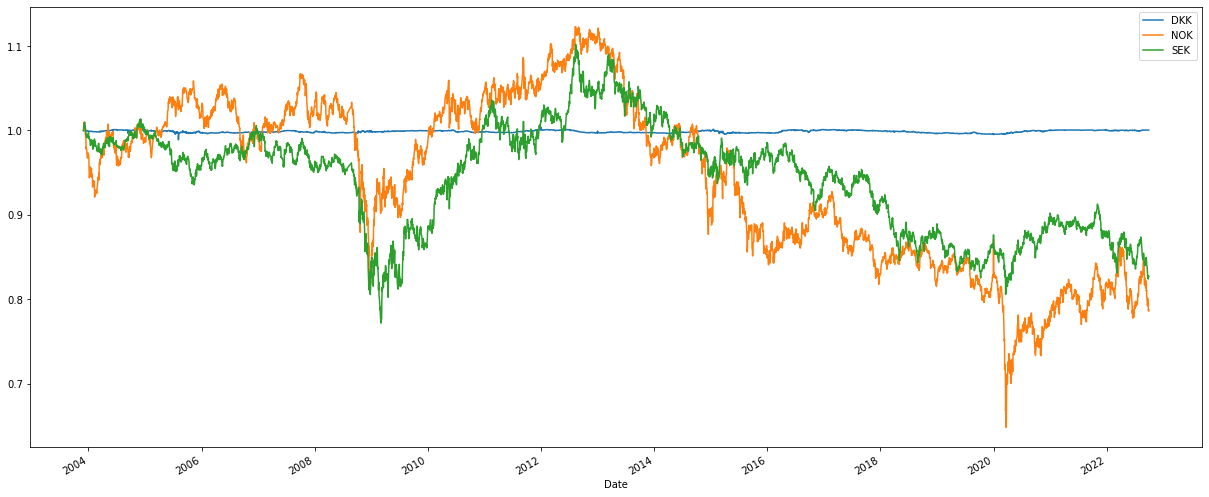

In [30]:
(inverse_fx_data/inverse_fx_data.iloc[0])[["DKK","NOK","SEK"]].plot(figsize=(21,9)) # DKK can act as an indirect EUR proxy position because it is very tightened to the EUR value

<AxesSubplot:xlabel='Date'>

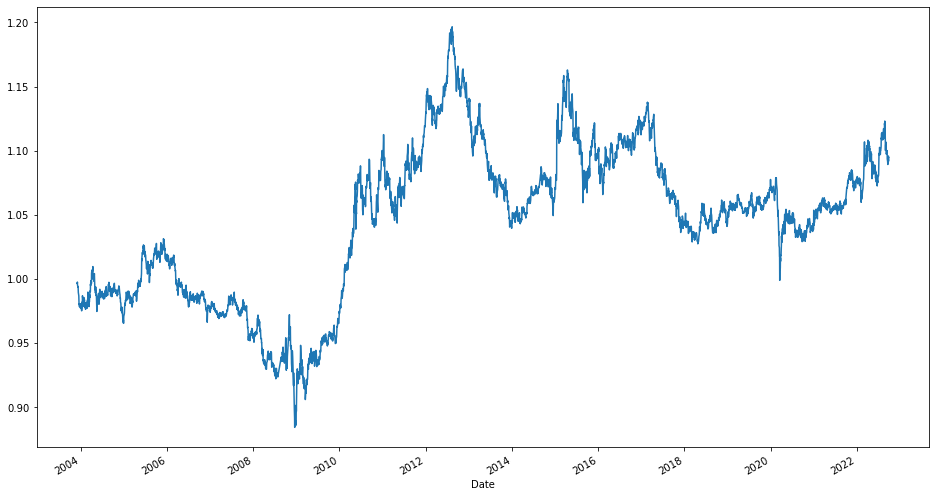

In [32]:
# Solomonic Portfolio of Currencies
(1+inverse_fx_data.pct_change().mean(axis=1)).cumprod().plot(figsize=(16,9))

Now we can save data to disk with the `pandas` method `to_csv`, as follows:



In [4]:
data.to_csv(
    "data/IVV_daily.csv",
    index=True,
    index_label="Date"
)

## 2 Adding Target (relevances)

1. Day-by-day relevances based upon daily returns

In [48]:
ratings = inverse_fx_data.pct_change().rank(axis=1).shift(-1)

In [50]:
ratings

,AUD,CAD,CHF,DKK,GBP,JPY,NOK,NZD,SEK,USD
Date,,,,,,,,,,
2003-12-01,5.0,3.0,7.0,8.0,6.0,2.0,9.0,4.0,10.0,1.0
2003-12-02,8.0,1.0,5.0,6.0,2.0,7.0,10.0,4.0,9.0,3.0
2003-12-03,6.0,1.0,4.0,3.0,2.0,9.0,10.0,7.0,5.0,8.0
2003-12-04,3.0,4.0,10.0,6.0,5.0,8.0,7.0,1.0,9.0,2.0
2003-12-05,10.0,9.0,8.0,5.0,4.0,2.0,1.0,6.0,7.0,3.0
...,...,...,...,...,...,...,...,...,...,...
2022-09-23,5.0,8.0,9.0,6.0,1.0,7.0,4.0,3.0,2.0,10.0
2022-09-26,5.0,4.0,3.0,7.0,8.0,6.0,1.0,2.0,9.0,10.0
2022-09-27,2.0,8.0,10.0,5.0,3.0,6.0,7.0,1.0,4.0,9.0


In [55]:
best_signal

,AUD,CAD,CHF,DKK,GBP,JPY,NOK,NZD,SEK,USD
Date,,,,,,,,,,
2003-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-12-02,False,False,False,False,False,False,False,False,True,False
2003-12-03,False,False,False,False,False,False,True,False,False,False
2003-12-04,False,False,False,False,False,False,True,False,False,False
2003-12-05,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
2022-09-23,False,False,False,False,False,True,False,False,False,False
2022-09-26,False,False,False,False,False,False,False,False,False,True
2022-09-27,False,False,False,False,False,False,False,False,False,True


In [65]:
best_signal = (ratings==10.).shift(1)
worst_signal = (ratings==1.).shift(1)

In [57]:
fx_returns_daily = inverse_fx_data.pct_change()
fx_returns_daily

,AUD,CAD,CHF,DKK,GBP,JPY,NOK,NZD,SEK,USD
Date,,,,,,,,,,
2003-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-12-02,-0.004362,-0.004722,-0.002378,-0.000229,-0.003295,-0.006543,0.000061,-0.004601,0.000799,-0.010254
2003-12-03,0.003893,-0.005648,-0.001091,0.000040,-0.003853,0.001371,0.005605,-0.002775,0.003990,-0.002805
2003-12-04,0.001767,-0.004422,0.001221,0.000107,-0.001567,0.003824,0.004231,0.002246,0.001228,0.003479
2003-12-05,-0.007859,-0.002960,0.003612,-0.000013,-0.001707,0.000229,0.000161,-0.008746,0.002002,-0.008698
...,...,...,...,...,...,...,...,...,...,...
2022-09-23,0.004390,-0.000287,-0.008854,0.000027,-0.000137,0.013386,-0.003753,0.002497,0.001642,-0.001101
2022-09-26,-0.001645,0.007587,0.008827,-0.000054,-0.026418,0.007180,-0.002558,-0.002674,-0.005027,0.015648
2022-09-27,-0.002395,-0.002964,-0.003184,0.000039,0.004355,-0.000014,-0.011717,-0.006859,0.004433,0.006880


In [58]:
fx_returns_daily[best_signal]

,AUD,CAD,CHF,DKK,GBP,JPY,NOK,NZD,SEK,USD
Date,,,,,,,,,,
2003-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-12-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000799,NaN
2003-12-03,NaN,NaN,NaN,NaN,NaN,NaN,0.005605,NaN,NaN,NaN
2003-12-04,NaN,NaN,NaN,NaN,NaN,NaN,0.004231,NaN,NaN,NaN
2003-12-05,NaN,NaN,0.003612,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2022-09-23,NaN,NaN,NaN,NaN,NaN,0.013386,NaN,NaN,NaN,NaN
2022-09-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.015648
2022-09-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.006880


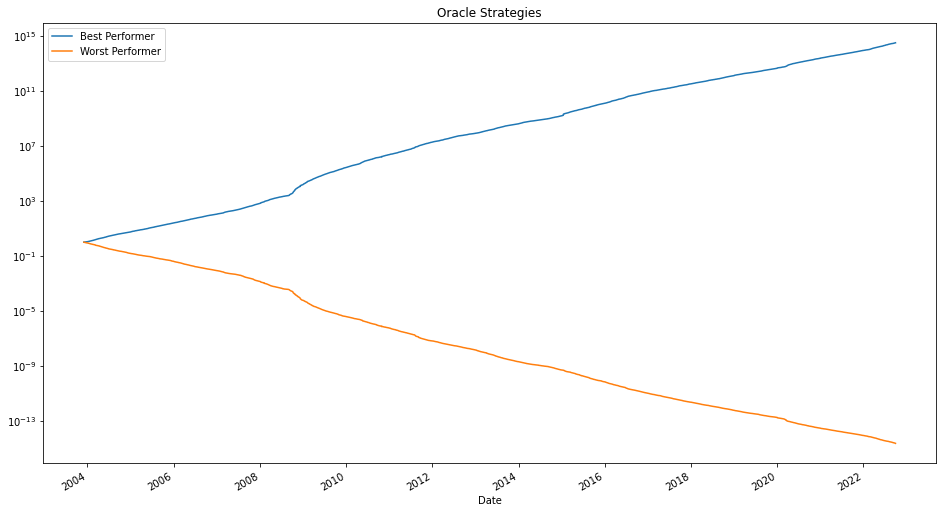

In [67]:
plot_args = {
    "figsize": (16,9),
    "legend": True
}

(1+fx_returns_daily[best_signal].mean(axis=1,skipna=True)).cumprod().rename("Best Performer").plot(**plot_args, title="Oracle Strategies");
(1+fx_returns_daily[worst_signal].mean(axis=1,skipna=True)).cumprod().rename("Worst Performer").plot(**plot_args);
plt.semilogy();


In [74]:
score_returns = pd.melt(
    ratings,
    var_name="symbols",
    value_name="score_return",
    ignore_index=False
).reset_index(
).sort_values(by=["Date","symbols"])

In [76]:
score_returns.dropna(inplace=True)

In [77]:
score_returns.shape[0]

48790

In [90]:
score_returns.rename(columns={"score_return": "rank"}, inplace=True)

,Date,symbols,rank
0,2003-12-01,AUD,5.0
4880,2003-12-01,CAD,3.0
9760,2003-12-01,CHF,7.0
14640,2003-12-01,DKK,8.0
19520,2003-12-01,GBP,6.0
...,...,...,...
29278,2022-09-28,JPY,2.0
34158,2022-09-28,NOK,4.0
39038,2022-09-28,NZD,10.0
43918,2022-09-28,SEK,8.0


In [95]:
score_returns= score_returns.astype({"rank": int})

In [96]:
score_returns

,Date,symbols,rank
0,2003-12-01,AUD,5
4880,2003-12-01,CAD,3
9760,2003-12-01,CHF,7
14640,2003-12-01,DKK,8
19520,2003-12-01,GBP,6
...,...,...,...
29278,2022-09-28,JPY,2
34158,2022-09-28,NOK,4
39038,2022-09-28,NZD,10
43918,2022-09-28,SEK,8


In [97]:
score_returns.to_csv(
    "fx_data/FX_quantized_returns.csv",
    index=False
)

## 3 Return-Based Features

In [54]:
# Checkpoint: Reset Kernel if needed
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import gc

from modules import performance_measures_helper as pms

# For Ratios with Extreme Values
from scipy.stats.mstats import winsorize

plot_args = {
    "figsize": (16,9),
    "legend": True
}

In [3]:
inverse_fx_rates = pd.read_csv(
    "fx_data/inverse_FX_rates.csv",
    index_col="Date",
    parse_dates=["Date"]
)

In [4]:
# Constructing Momentum Features (Raw Cumulative Returns Over Some Past Horizons)
days = [5,10,21,63]
feature_names = ["MOM1W","MOM2W","MOM1M","MOM3M"]
features = dict()

for f, d in zip(feature_names, days):
    features[f] = inverse_fx_rates.pct_change(d)

<AxesSubplot:xlabel='Date'>

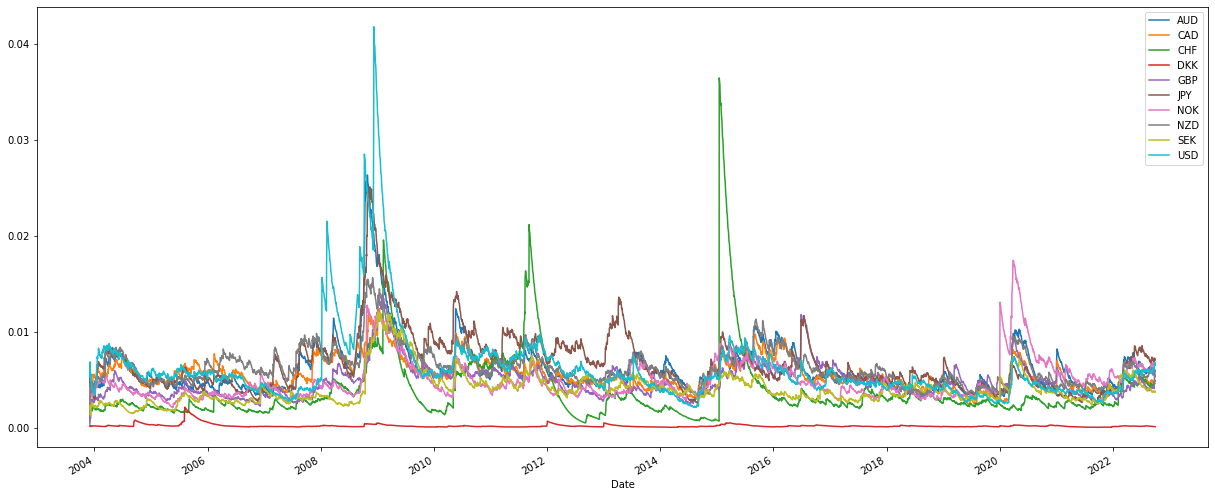

In [9]:
# 3M EWM Volatility as daily VOL estimator (GARCH estimators can also be used)
inverse_fx_rates.pct_change().ewm(span=63).std().plot(figsize=(21,9))

In [10]:
# Adding Year-Scaled Daily Volatility Stimator based on 3M EWM Volatility
features["EWVOL3M"] = np.sqrt(252)*inverse_fx_rates.pct_change().ewm(span=63).std()

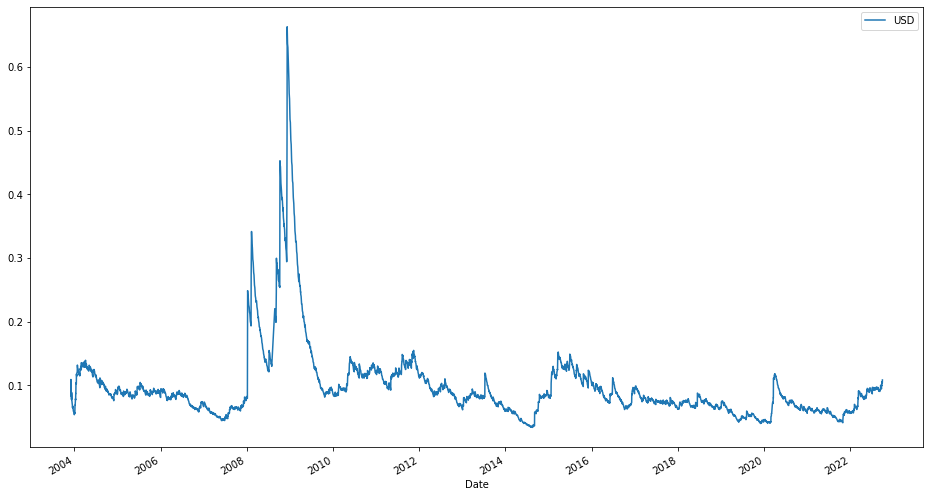

In [13]:
features["EWVOL3M"]["USD"].plot(**plot_args);

In [14]:
features.keys()

dict_keys(['MOM1W', 'MOM2W', 'MOM1M', 'MOM3M', 'EWVOL3M'])

In [18]:
# Adding Returns Scaled by the Corresponding Volatility-Period estimate
periods = [1,3,5,10,21]
scaled_feature_names = ["SRET1D","SRET3D","SRET1W","SRET2W","SRET1M"]

for f, d in zip(scaled_feature_names, periods):
    features[f] = np.sqrt(252/d)*inverse_fx_rates.pct_change(d)/features["EWVOL3M"]

## 4 PMs-Based Features

### 4.1 Sharpe Ratios

In [161]:
# TBA: Adding ISharpes (Israelsen Modified)
# Other PMs <
from modules import performance_measures_helper as pms

In [17]:
inverse_fx_rates.pct_change()

,AUD,CAD,CHF,DKK,GBP,JPY,NOK,NZD,SEK,USD
Date,,,,,,,,,,
2003-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-12-02,-0.004362,-0.004722,-0.002378,-0.000229,-0.003295,-0.006543,0.000061,-0.004601,0.000799,-0.010254
2003-12-03,0.003893,-0.005648,-0.001091,0.000040,-0.003853,0.001371,0.005605,-0.002775,0.003990,-0.002805
2003-12-04,0.001767,-0.004422,0.001221,0.000107,-0.001567,0.003824,0.004231,0.002246,0.001228,0.003479
2003-12-05,-0.007859,-0.002960,0.003612,-0.000013,-0.001707,0.000229,0.000161,-0.008746,0.002002,-0.008698
...,...,...,...,...,...,...,...,...,...,...
2022-09-23,0.004390,-0.000287,-0.008854,0.000027,-0.000137,0.013386,-0.003753,0.002497,0.001642,-0.001101
2022-09-26,-0.001645,0.007587,0.008827,-0.000054,-0.026418,0.007180,-0.002558,-0.002674,-0.005027,0.015648
2022-09-27,-0.002395,-0.002964,-0.003184,0.000039,0.004355,-0.000014,-0.011717,-0.006859,0.004433,0.006880


In [20]:
ISR1M = inverse_fx_rates.pct_change().rolling(window=21).apply(
    pms.israelsen_sharpe_ratio
    )

<AxesSubplot:xlabel='Date'>

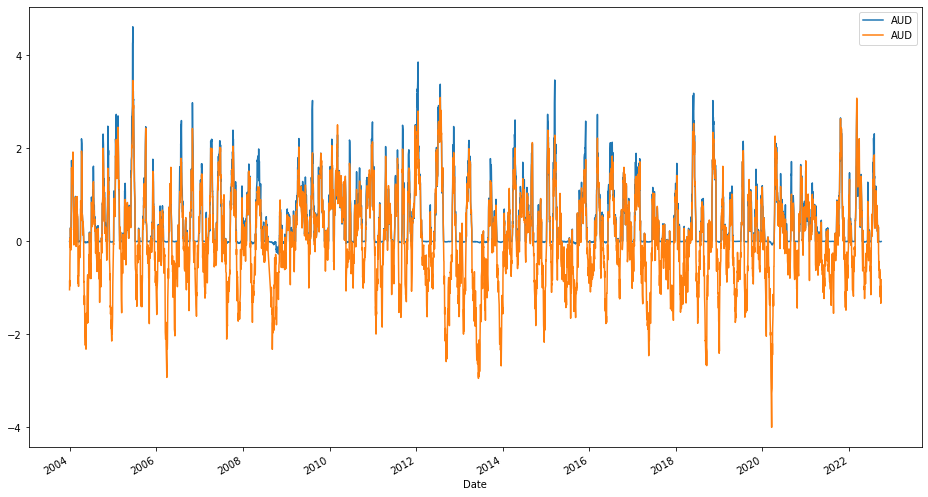

In [21]:
# Differences appear because of different sample daily volatility estimation and israelsen trick
(ISR1M["AUD"]*np.sqrt(21/252)).plot(**plot_args)
features["SRET1M"]["AUD"].plot(**plot_args)

In [23]:
%whos DataFrame


Variable           Type         Data/Info
-----------------------------------------
ISR1M              DataFrame                     AUD     <...>n[4880 rows x 10 columns]
inverse_fx_rates   DataFrame                     AUD     <...>n[4880 rows x 10 columns]


In [25]:
# Thus, let us include 1M, 3M, 6M Sharpes as predictors
win = [21, 63, 126]
isharpe_names = ["ISR1M", "ISR3M", "ISR6M"]

for w, name in zip(win, isharpe_names):
    features[name] = inverse_fx_rates.pct_change().rolling(window=w).apply(pms.israelsen_sharpe_ratio)*np.sqrt(w/252)

In [26]:
features.keys()

dict_keys(['MOM1W', 'MOM2W', 'MOM1M', 'MOM3M', 'EWVOL3M', 'SRET1D', 'SRET3D', 'SRET1W', 'SRET2W', 'SRET1M', 'ISR1M', 'ISR3M', 'ISR6M'])

<AxesSubplot:xlabel='Date'>

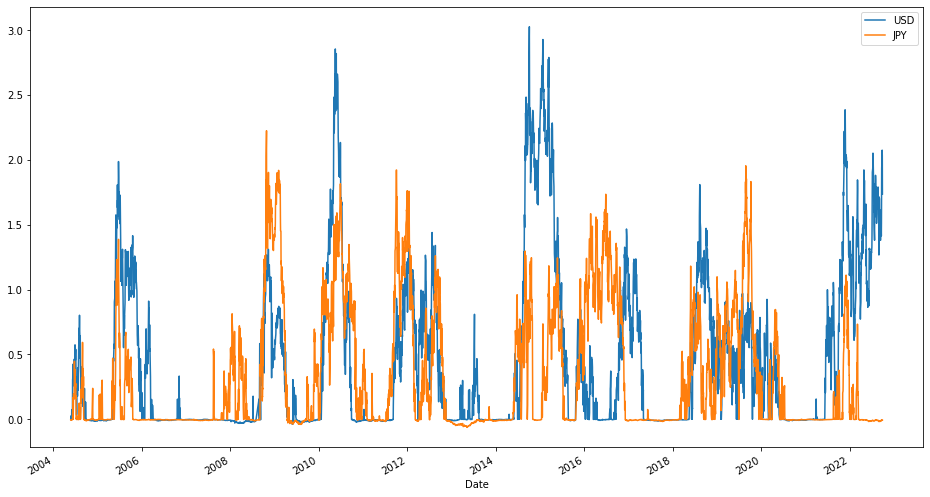

In [27]:
features["ISR6M"][["USD","JPY"]].plot(**plot_args)

### 4.2 Skewness-Kurtosis Ratios

In [30]:
# Thus, let us include 1M, 3M, 6M Sharpes as predictors
wins = [21, 63, 126]
names = ["SKR1M", "SKR3M", "SKR6M"]

for w, name in zip(wins, names):
    features[name] = inverse_fx_rates.pct_change().rolling(window=w).apply(pms.leon_sk_ratio)

In [31]:
features.keys()

dict_keys(['MOM1W', 'MOM2W', 'MOM1M', 'MOM3M', 'EWVOL3M', 'SRET1D', 'SRET3D', 'SRET1W', 'SRET2W', 'SRET1M', 'ISR1M', 'ISR3M', 'ISR6M', 'SKR1M', 'SKR3M', 'SKR6M'])

<AxesSubplot:xlabel='Date'>

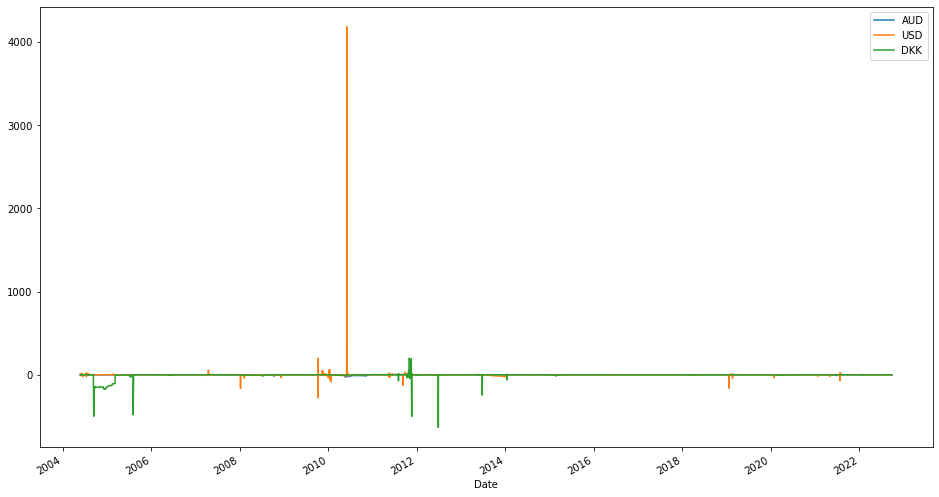

In [32]:
features["SKR6M"][["AUD","USD","DKK"]].plot(**plot_args)

In [35]:
currencies = inverse_fx_rates.columns.tolist()

In [59]:
# Winsorizing SK Ratio
for feature in list(features.keys())[-3:]:
    features[feature] = features[feature].apply(winsorize, limits=(0.05,0.05))

<AxesSubplot:>

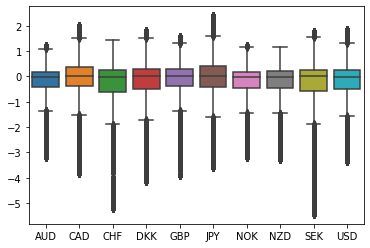

In [60]:
sns.boxplot(
    data=features["SKR1M"][currencies],
)


<AxesSubplot:xlabel='Date'>

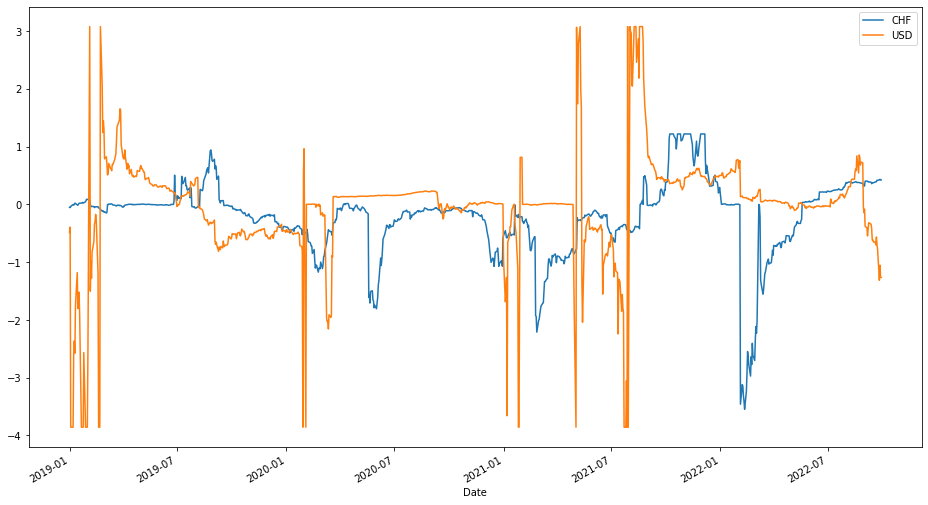

In [72]:
features["SKR6M"]["2019":][["CHF","USD"]].plot(**plot_args)

### 4.3 PMs Based on Quantiles

#### 4.3.1 VaR Ratio (Caporin-Lisi)

<AxesSubplot:xlabel='Date'>

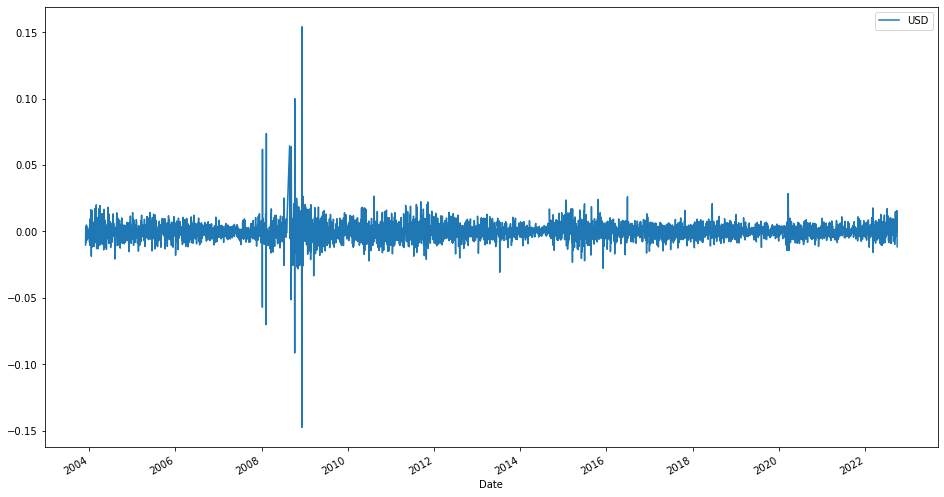

In [74]:
inverse_fx_rates.pct_change()["USD"].plot(**plot_args)

<AxesSubplot:xlabel='Date'>

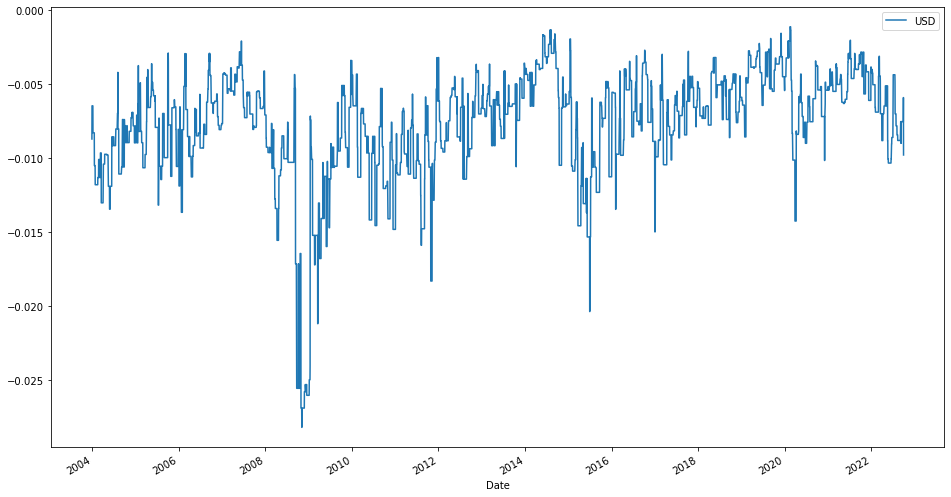

In [76]:
inverse_fx_rates.pct_change()["USD"].rolling(window=21).quantile(0.05).plot(**plot_args)

In [ ]:
import importlib
importlib.reload(pms)

<AxesSubplot:xlabel='Date'>

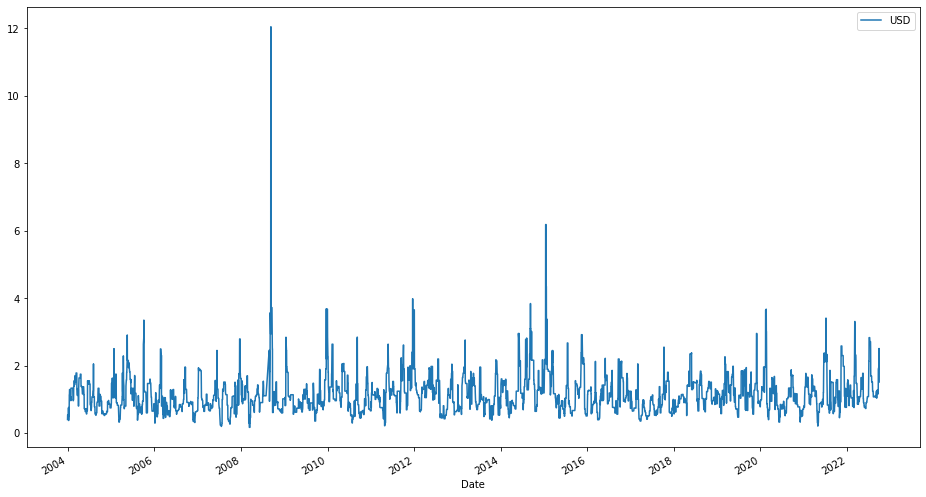

In [84]:
from modules import performance_measures_helper as pms
inverse_fx_rates.pct_change()["USD"].rolling(window=21).apply(pms.var_ratio).abs().plot(**plot_args)

In [86]:
importlib.reload(pms)

<module 'modules.performance_measures_helper' from '/home/hcf/source/Python/letor_fx/modules/performance_measures_helper.py'>

In [92]:
from modules.performance_measures_helper import var_ratio

In [108]:
features.keys()

dict_keys(['MOM1W', 'MOM2W', 'MOM1M', 'MOM3M', 'EWVOL3M', 'SRET1D', 'SRET3D', 'SRET1W', 'SRET2W', 'SRET1M', 'ISR1M', 'ISR3M', 'ISR6M', 'SKR1M', 'SKR3M', 'SKR6M'])

In [110]:
%whos dict

Variable    Type    Data/Info
-----------------------------
features    dict    n=16
kwds        dict    n=1
plot_args   dict    n=2


In [1]:
import pickle

In [3]:
with open("fx_data/FX_features.pkl","rb") as file:
    features = pickle.load(file)

features.keys()

dict_keys(['MOM1W', 'MOM2W', 'MOM1M', 'MOM3M', 'EWVOL3M', 'SRET1D', 'SRET3D', 'SRET1W', 'SRET2W', 'SRET1M', 'ISR1M', 'ISR3M', 'ISR6M', 'SKR1M', 'SKR3M', 'SKR6M'])

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Caporin-Lisi VaR Ratio
from modules.performance_measures_helper import var_ratio

In [8]:
inverse_fx_rates = pd.read_csv(
    "fx_data/inverse_FX_rates.csv",
    index_col="Date",
    parse_dates=["Date"]
)

In [ ]:
confidence_levels = [0.99, 0.95, 0.90, 0.80]
sample_periods = [21, 63, 126]

names = ["VARR1M","VARR3M", "VARR6M"]

for period, name in zip(sample_periods, names):
    for conf in confidence_levels:
        print(f"Confidence Level {100*conf}")
        features[name+str(100*conf)] = inverse_fx_rates.pct_change().rolling(window=period).apply(
            var_ratio,            
            kwargs={'quant': conf}
        )

In [27]:
features.keys()

dict_keys(['MOM1W', 'MOM2W', 'MOM1M', 'MOM3M', 'EWVOL3M', 'SRET1D', 'SRET3D', 'SRET1W', 'SRET2W', 'SRET1M', 'ISR1M', 'ISR3M', 'ISR6M', 'SKR1M', 'SKR3M', 'SKR6M'])

In [28]:
with open("fx_data/FX_features.pkl","wb") as f:
    pickle.dump(features, f)